# Introduction

In the following, I download "MovieLens" datasets that was collected by the GroupLens Research Project at the University of Minnoseta. <br>
The package contains three datasets of **100,000 ratings** of **943 users** on **1689 movies**. <br>
Further information can be found in the README file of the package.

Database reference: https://grouplens.org/datasets/movielens/100k/ 

## Downloading Datasets:

In [ ]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'

def download_zip(url, path='./'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path)
    
download_zip(url, './data/')

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

## Uploading Three Datasets:

In [2]:
df_data = pd.read_csv('data/ml-100k/u.data', sep='\t', header=None)
df_data.columns = ['user_id','item_id','rating','timestamp']
df_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
df_item = pd.read_csv('data/ml-100k/u.item', sep='|', header=None)
col_namse = """movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western"""
df_item.columns = [w.strip().replace(' ','_') for w in col_namse.split('|')]
df_item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df_user = pd.read_csv('data/ml-100k/u.user', sep='|', header=None)
col_namse = 'user id | age | gender | occupation | zip code'
df_user.columns = [w.strip().replace(' ','_') for w in col_namse.split('|')]
df_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Exploring datasets:

In [5]:
df_data.shape, df_item.shape, df_user.shape

((100000, 4), (1682, 24), (943, 5))

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
 df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
item_id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [8]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [9]:
df_item.drop(['video_release_date'], axis=1, inplace=True)
df_item['release_date'] = pd.to_datetime(df_item['release_date'])

In [10]:
df_item[df_item['release_date'].isna()].T

,266
movie_id,267
movie_title,unknown
release_date,NaT
IMDb_URL,NaN
unknown,1
Action,0
Adventure,0
Animation,0
Children's,0
Comedy,0


In [11]:
df_item.dropna(subset=['release_date'], inplace=True)
df_item.reset_index(drop=True, inplace=True)

In [12]:
df_item.isna().sum()

movie_id        0
movie_title     0
release_date    0
IMDb_URL        2
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [13]:
df_item.describe()

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [15]:
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


## Visualizing Datasets:

### Univariate plots for: rating, age, release date, gender, and occupation:

(Displaying univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames)

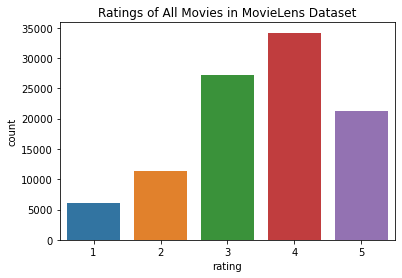

In [16]:
sns.countplot(x='rating', data=df_data)
plt.title('Ratings of All Movies in MovieLens Dataset')
plt.show()

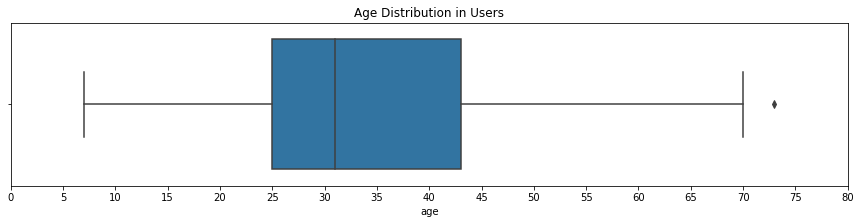

In [17]:
plt.figure(figsize=(15,3))
sns.boxplot(x='age', data=df_user)
plt.xticks(list(range(0,85,5)))
plt.title('Age Distribution in Users')
plt.show()

In [18]:
y1 = df_item['release_date'].min().year
y2 = df_item['release_date'].max().year
print('Dataset has information from year {} to {}.\nIt coveres {} years.'.format(y1,y2,y2-y1))

Dataset has information from year 1922 to 1998.
It coveres 76 years.


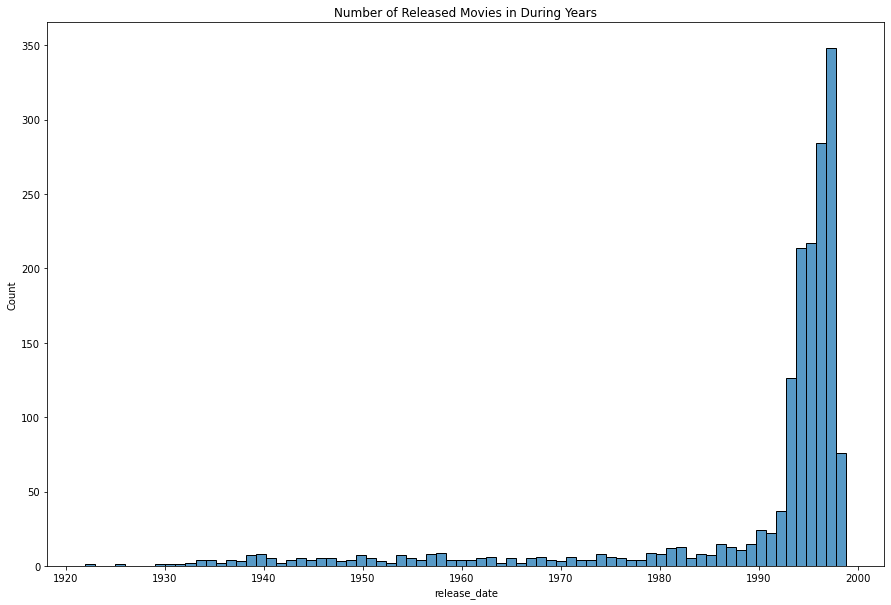

In [19]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_item, x='release_date', bins=y2-y1)
plt.title('Number of Released Movies in During Years')
plt.show()

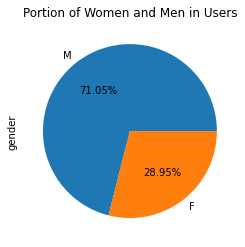

In [20]:
df_user['gender'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('Portion of Women and Men in Users')
plt.show()

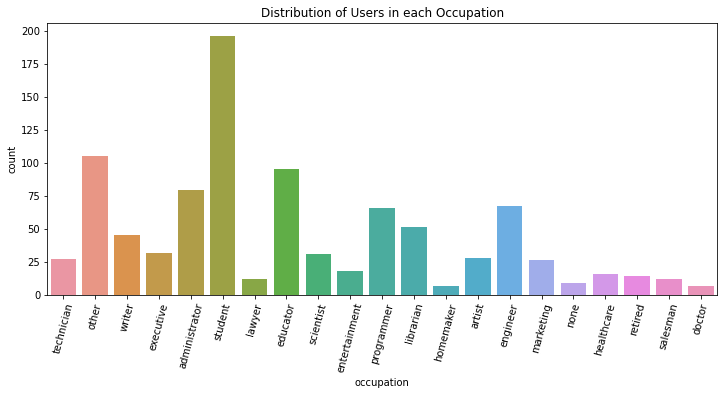

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x=df_user['occupation'])
plt.xticks(rotation=75)
plt.title('Distribution of Users in each Occupation')
plt.show()

## Genres Popularity Over The Years:
(Visualizing how popularity of Genres has changed over the years. From the graph one is able to see for any given year, movies of which genre got released the most.)

### First Approach:

In [22]:
df_genre = df_item.drop(columns=['movie_id', 'movie_title', 'IMDb_URL','unknown'], axis=1)

df_genre['year'] = df_genre['release_date'].dt.year
df_genre.drop(['release_date'], axis=1, inplace=True)

df_genre.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995


In [23]:
df_year = df_genre.groupby(['year']).sum()
df_year['popular_genre'] = df_year.idxmax(axis=1)
df_year['popularity_rate'] = df_year.max(axis=1)
df_year['movies_amount'] = df_year.sum(axis=1)
df_year.head(10)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,popular_genre,popularity_rate,movies_amount
year,,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Horror,1,2
1926,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,Drama,1,2
1930,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,Drama,1,2
1931,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,Crime,1,4
1932,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,Romance,1,3
1933,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,Comedy,1,4
1934,0,0,0,0,2,0,0,1,0,0,...,1,1,1,0,0,0,0,Comedy,2,8
1935,0,0,0,0,2,0,0,0,0,0,...,1,0,1,0,1,0,0,Comedy,2,8
1936,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,Comedy,1,3


In [24]:
df_year = df_year[['popular_genre','popularity_rate','movies_amount']]
df_year['popularity%'] = df_year['popularity_rate'] * 100 / df_year['movies_amount']
clear_output()
df_year.head(10)

,popular_genre,popularity_rate,movies_amount,popularity%
year,,,,
1922,Horror,1,2,50.000000
1926,Drama,1,2,50.000000
1930,Drama,1,2,50.000000
1931,Crime,1,4,25.000000
1932,Romance,1,3,33.333333
1933,Comedy,1,4,25.000000
1934,Comedy,2,8,25.000000
1935,Comedy,2,8,25.000000
1936,Comedy,1,3,33.333333


In [25]:
df_year.reset_index(inplace=True)
df_year.head()

,year,popular_genre,popularity_rate,movies_amount,popularity%
0,1922,Horror,1,2,50.000000
1,1926,Drama,1,2,50.000000
2,1930,Drama,1,2,50.000000
3,1931,Crime,1,4,25.000000
4,1932,Romance,1,3,33.333333


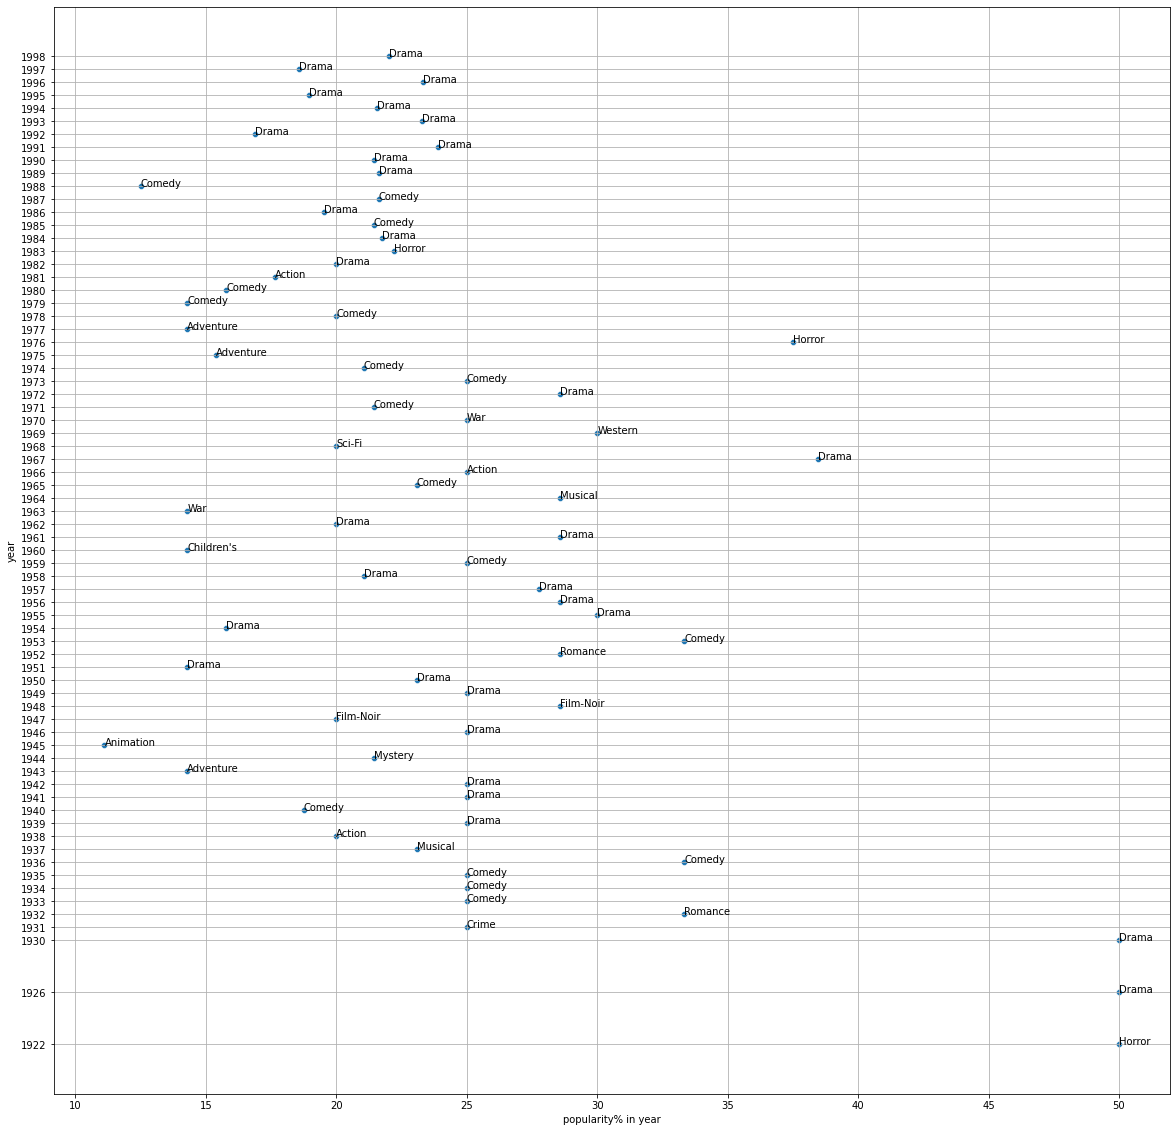

In [26]:
plt.figure(figsize=(20,20))
ax = sns.scatterplot(data=df_year, x='popularity%', y='year')

for i in range(len(df_year)):
    text, x, y = df_year.loc[i,['popular_genre','popularity%','year']]
    ax.annotate(text, (x,y))

plt.xlabel('popularity% in year')
plt.yticks(df_year['year'])

plt.grid()
plt.show()

### Second Approach:

In [27]:
df_item.columns

Index(['movie_id', 'movie_title', 'release_date', 'IMDb_URL', 'unknown',
       'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [28]:
df_year = df_item.drop(['movie_id', 'movie_title','IMDb_URL', 'unknown'], axis=1)
df_year['release_date'] = df_year['release_date'].dt.year
df_year.set_index('release_date', inplace=True)
df_year.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_date,,,,,,,,,,,,,,,,,,
1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1995,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [29]:
df_year = df_year[df_year==1].stack().reset_index().drop(0,1)
df_year.columns = ['year', 'genre']
df_year.head()

,year,genre
0,1995,Animation
1,1995,Children's
2,1995,Comedy
3,1995,Action
4,1995,Adventure


In [30]:
genres = df_year['genre'].unique()
genres.sort()

years = df_year['year'].unique()
years.sort()

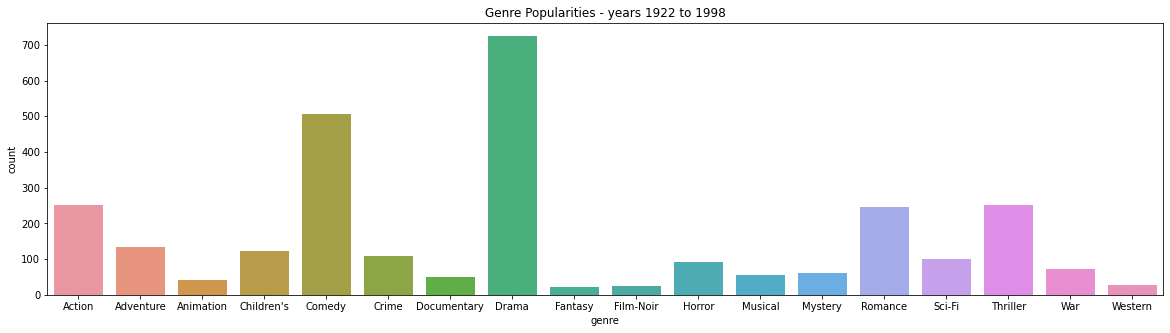

In [31]:
plt.figure(figsize=(20,5))
sns.countplot(data=df_year, x='genre', order=genres)
plt.title('Genre Popularities - years 1922 to 1998')
plt.show()

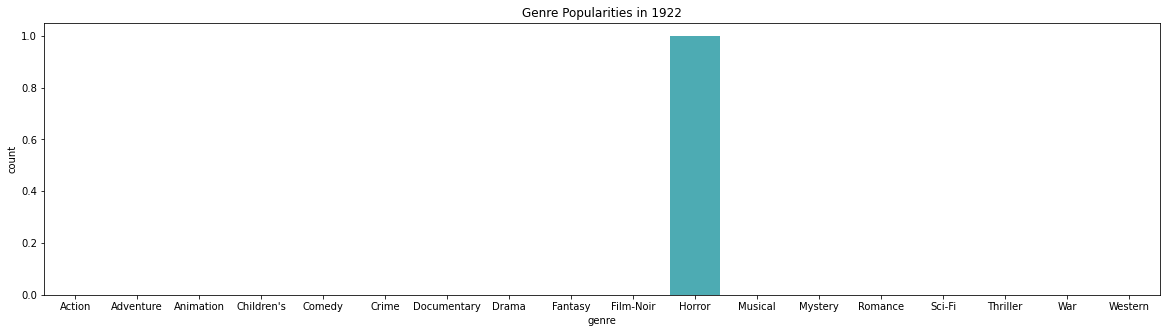

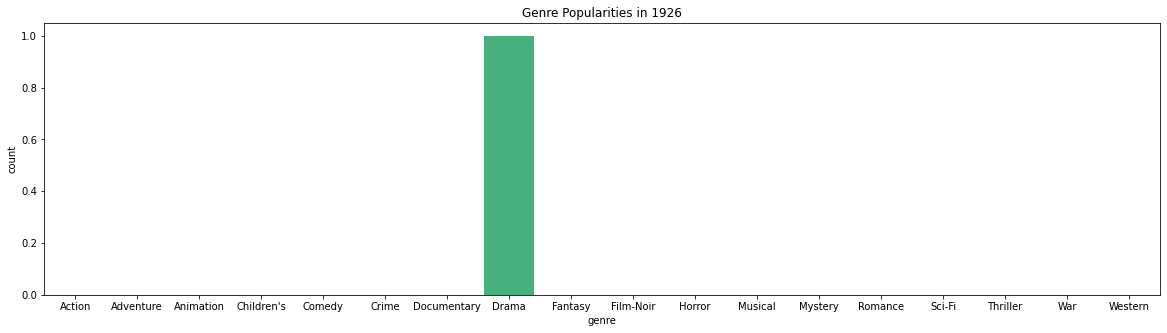

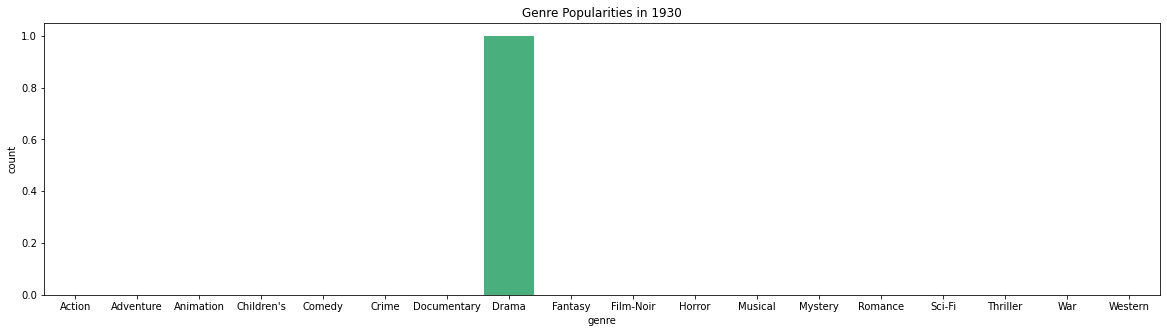

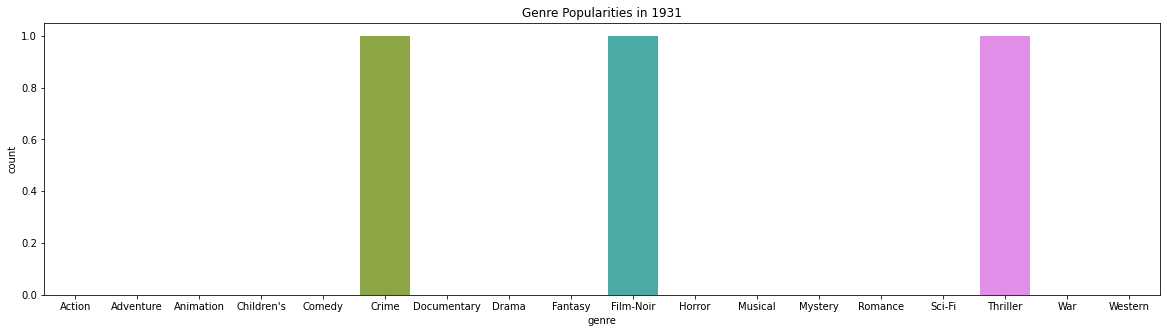

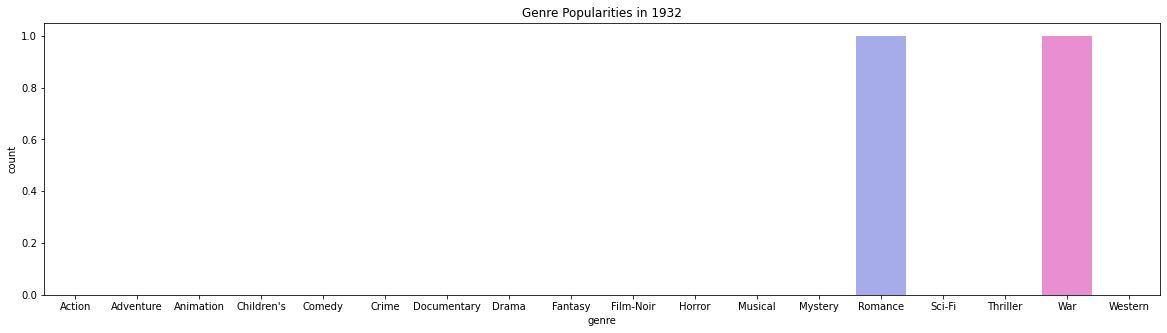

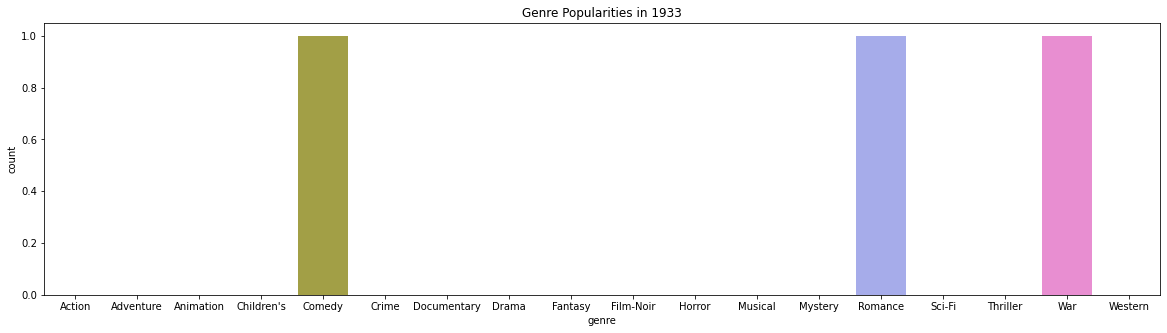

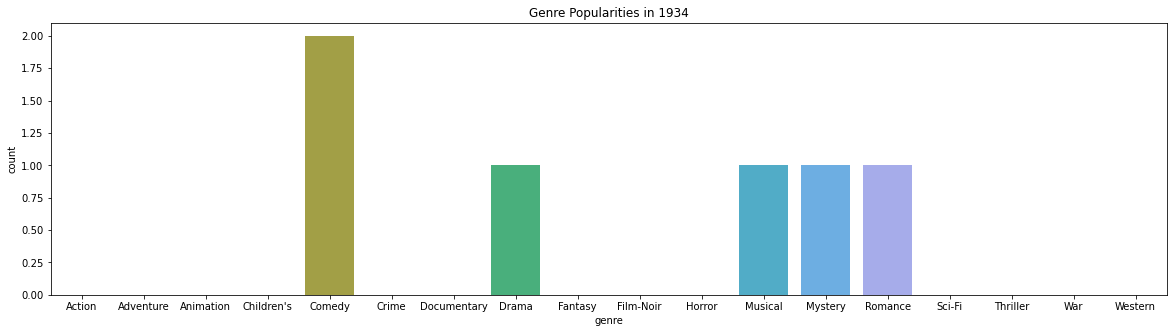

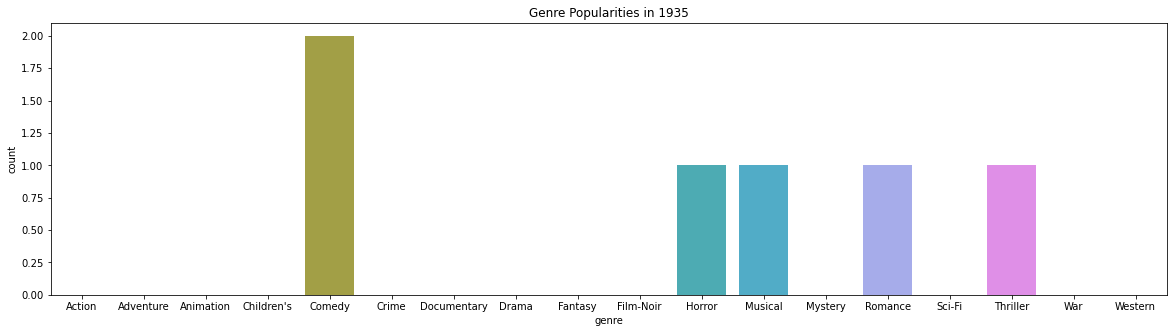

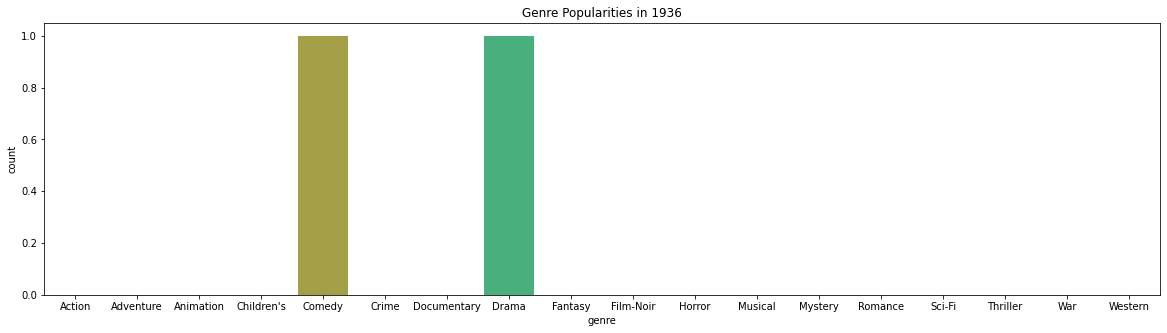

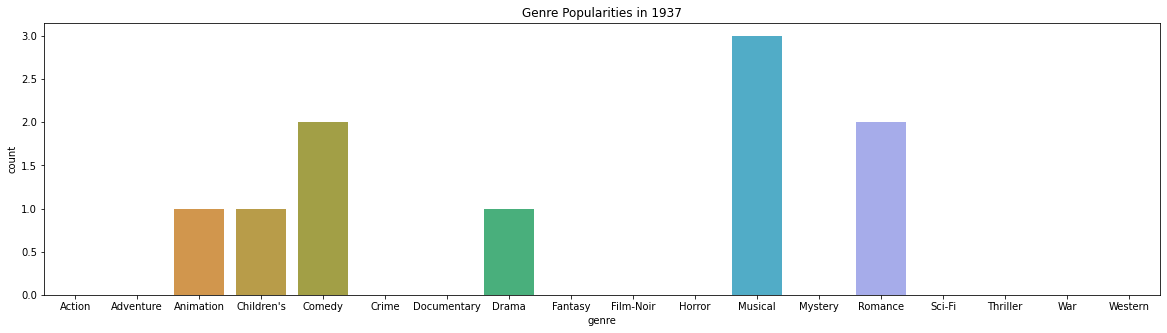

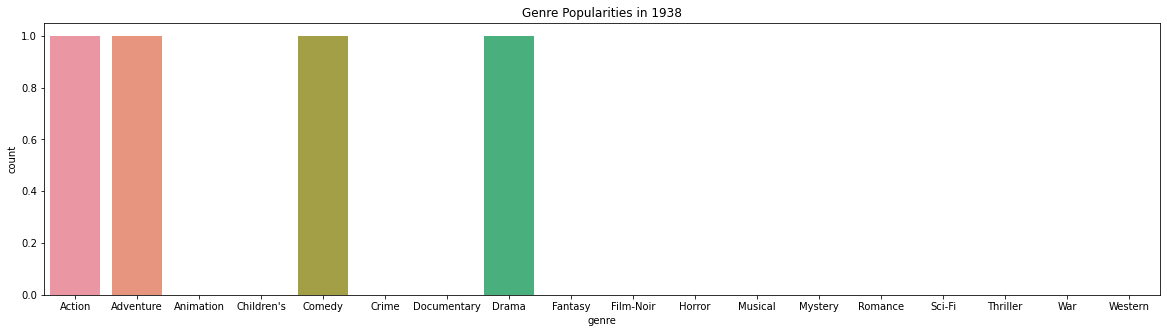

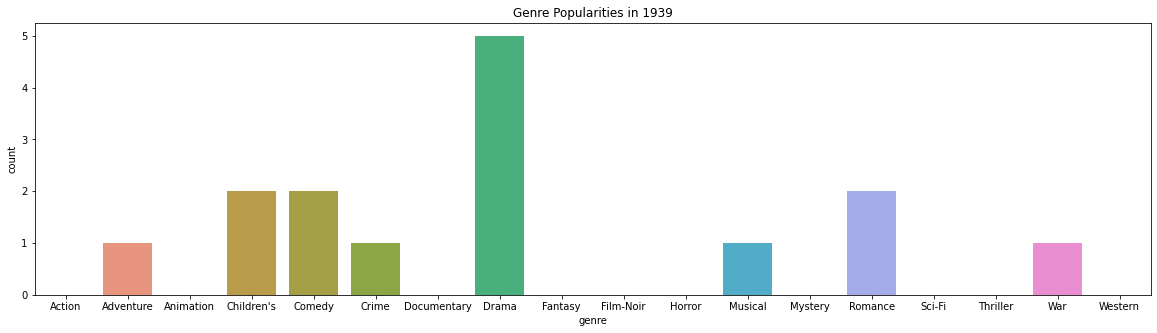

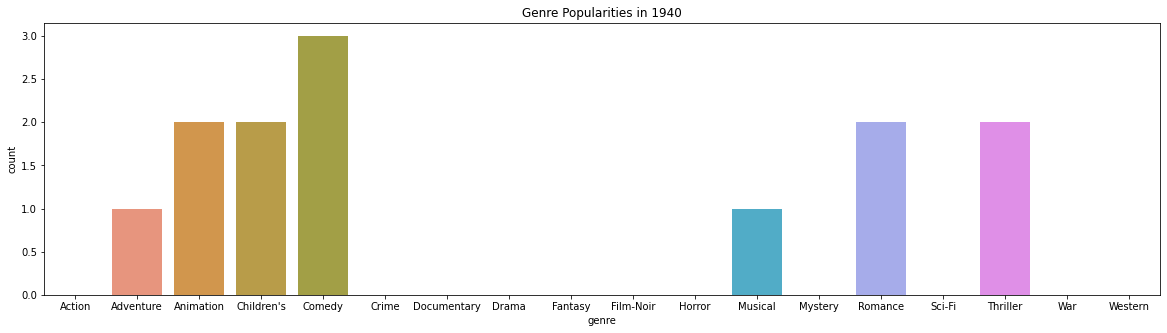

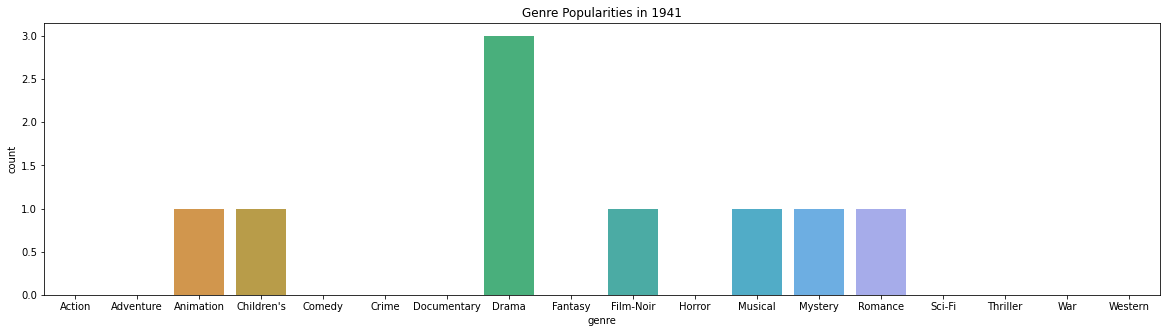

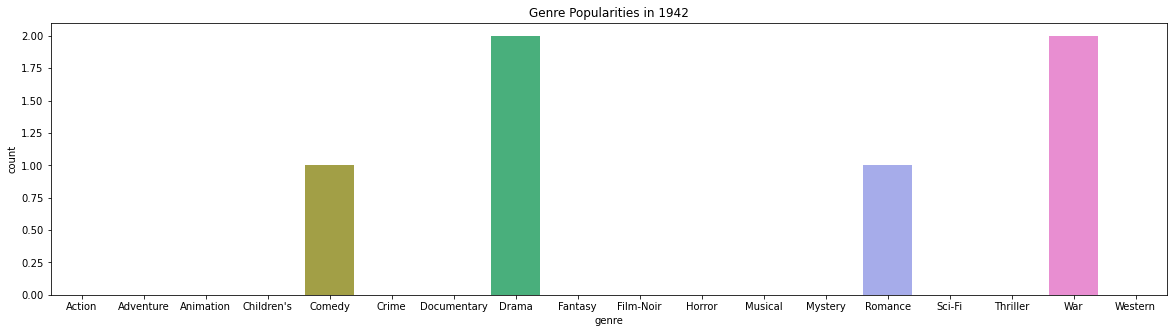

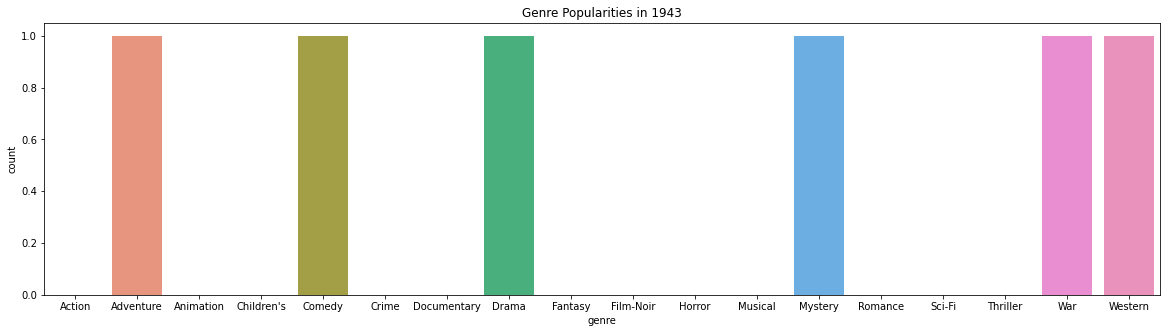

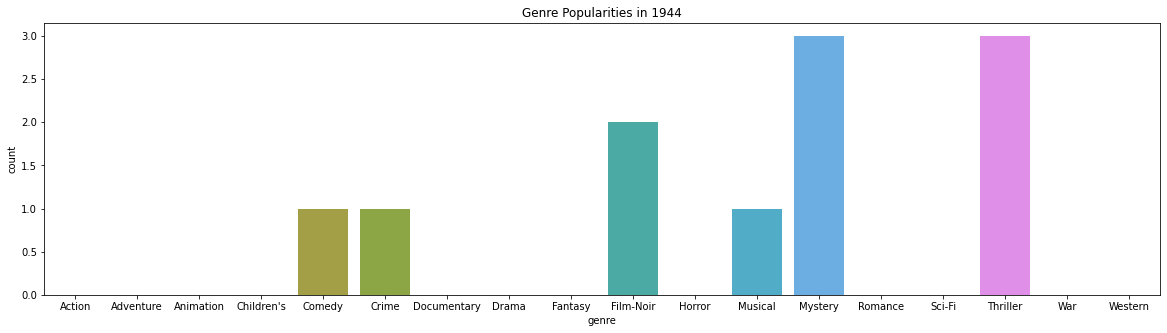

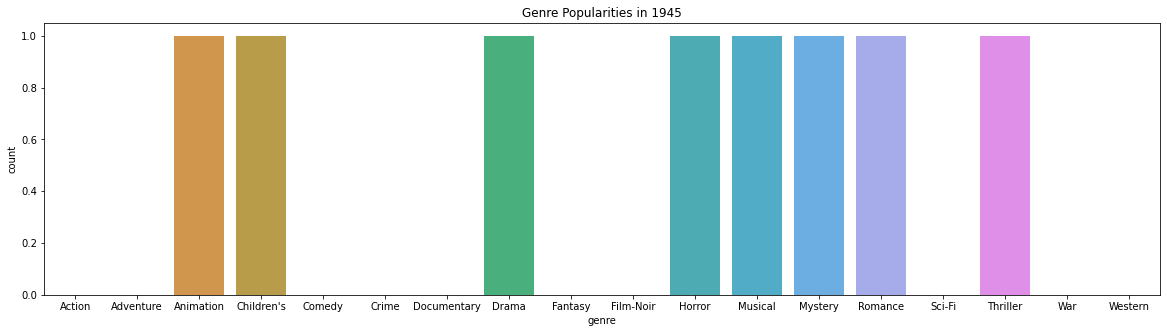

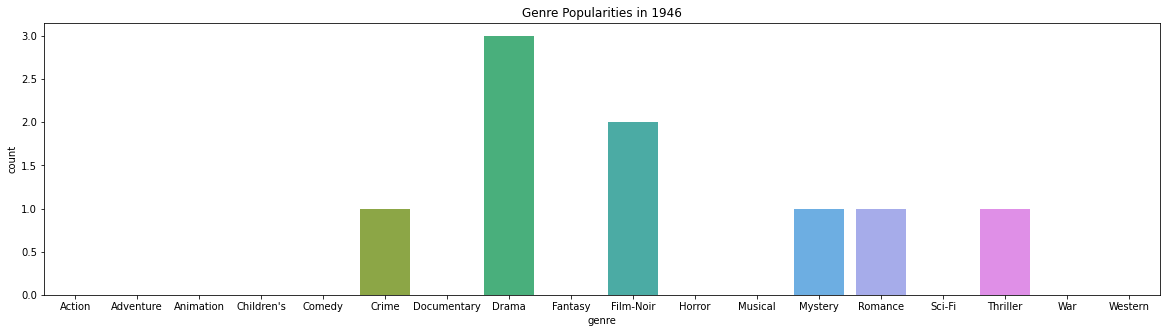

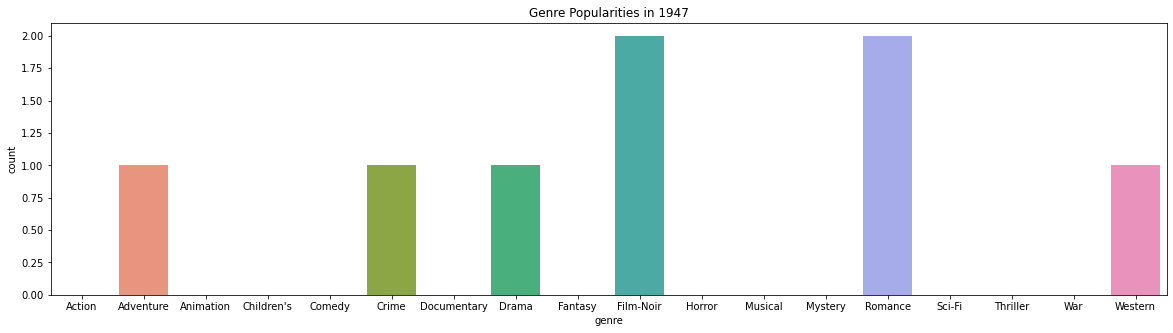

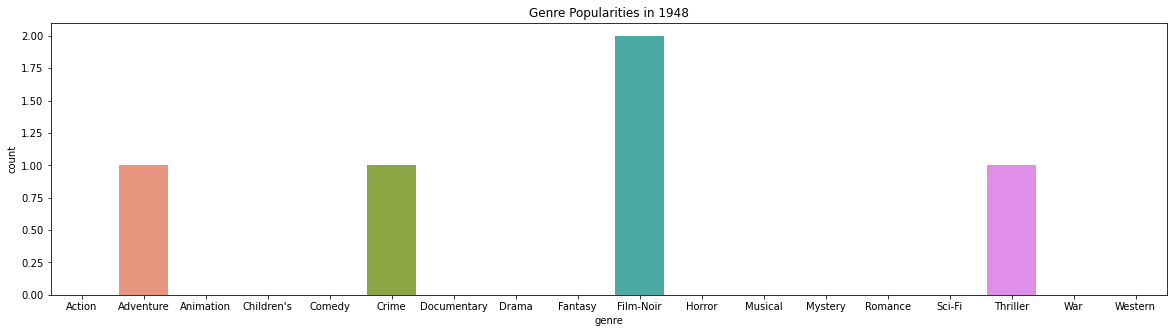

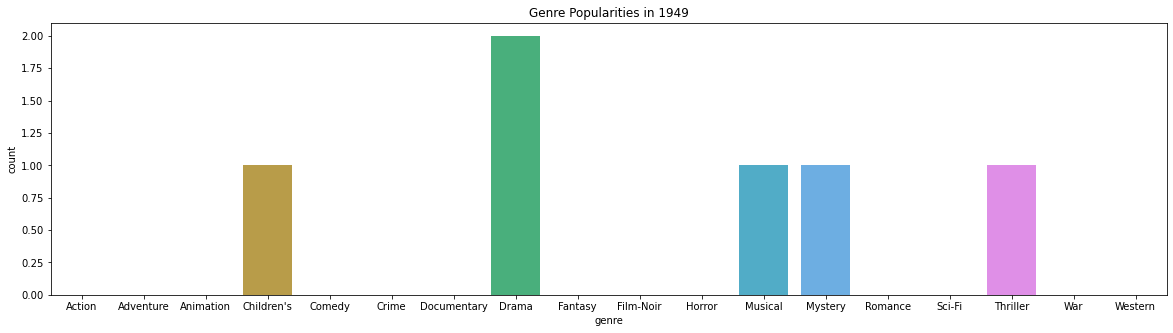

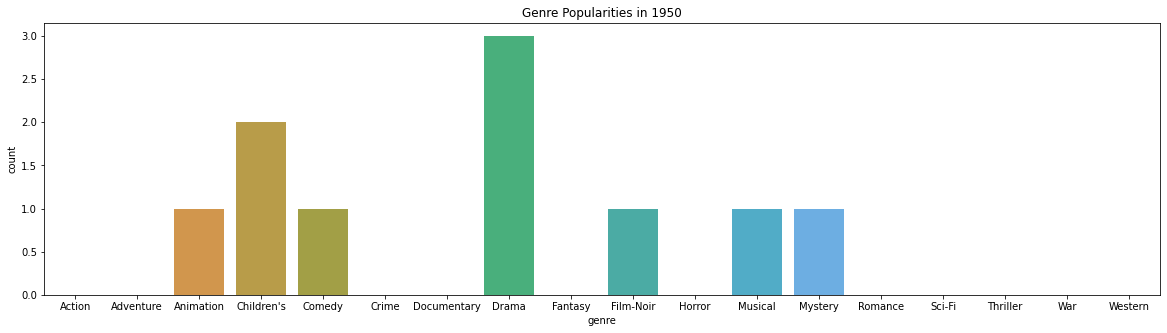

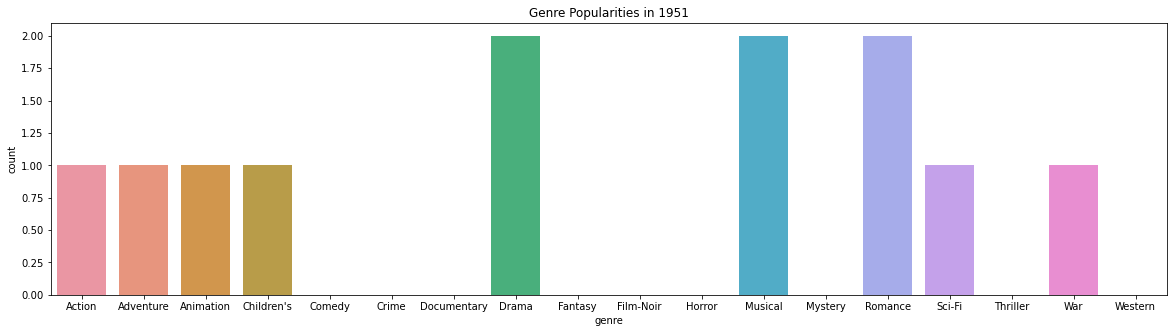

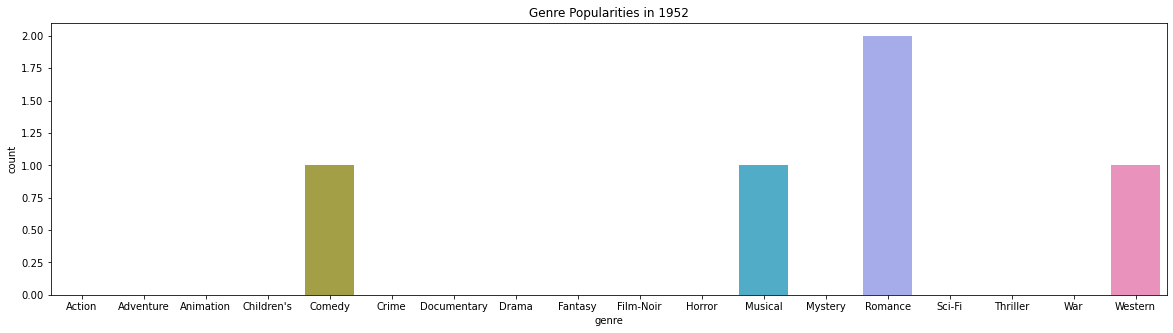

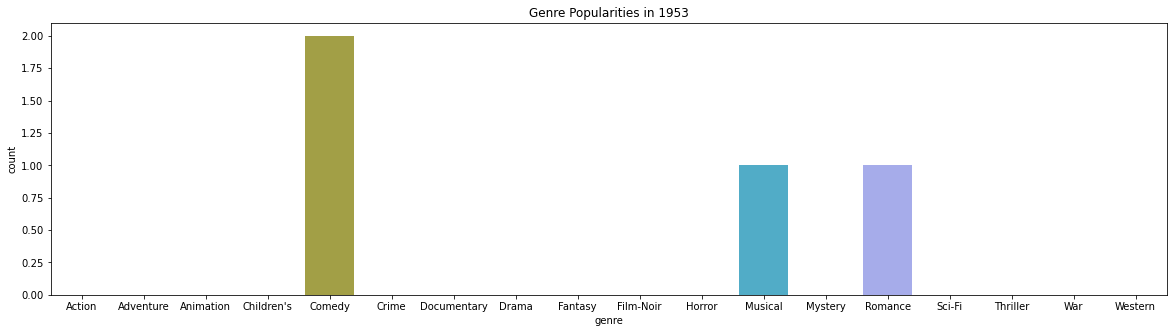

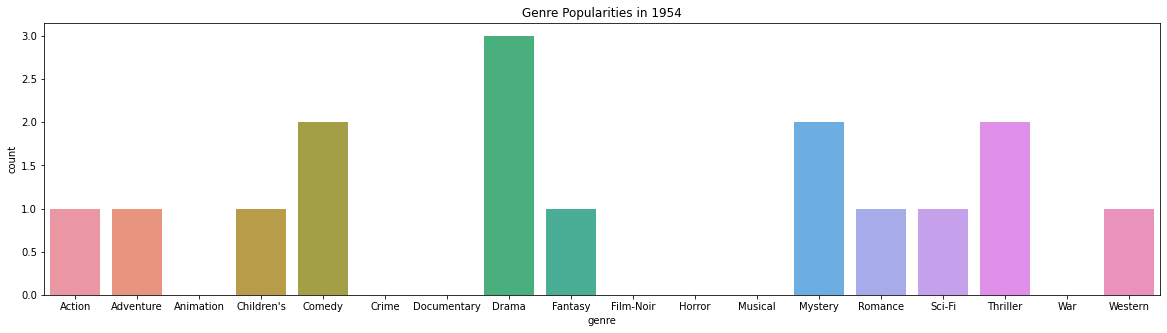

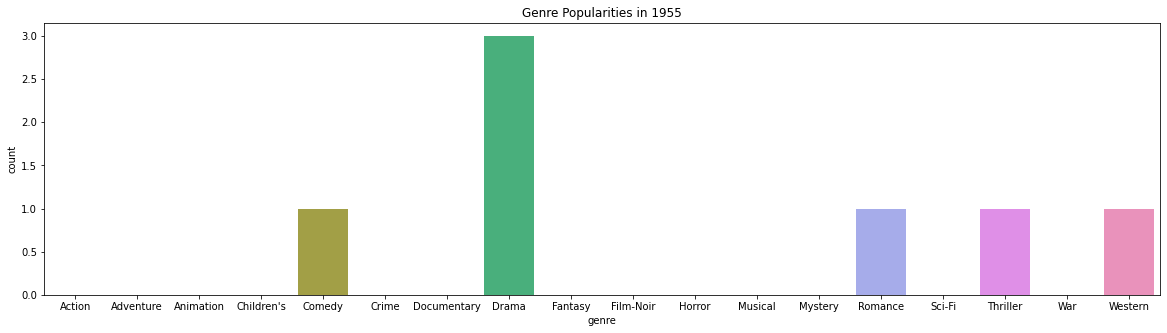

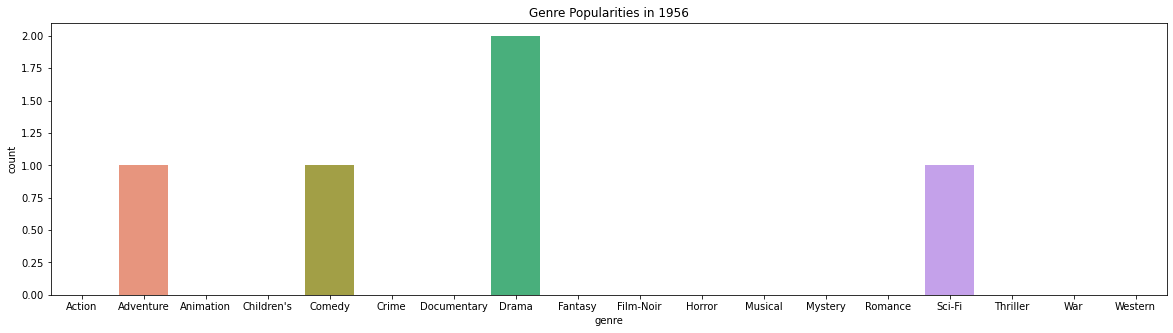

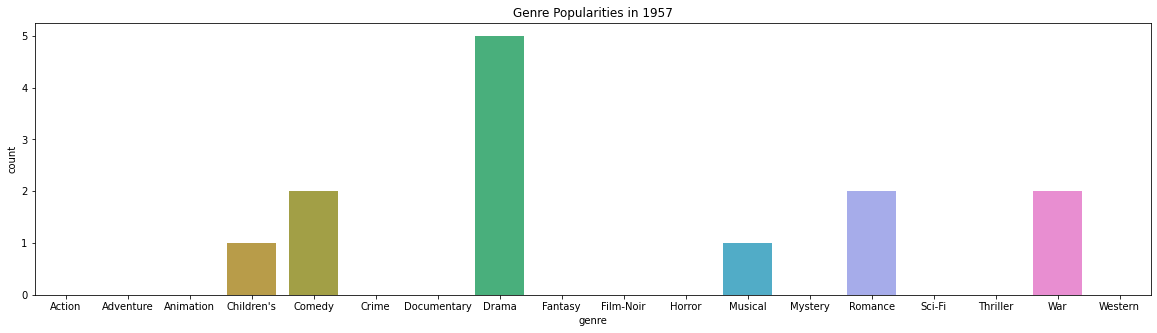

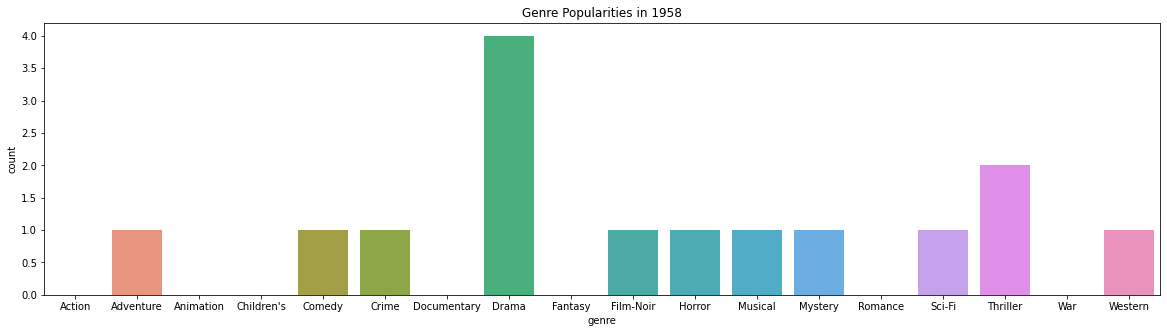

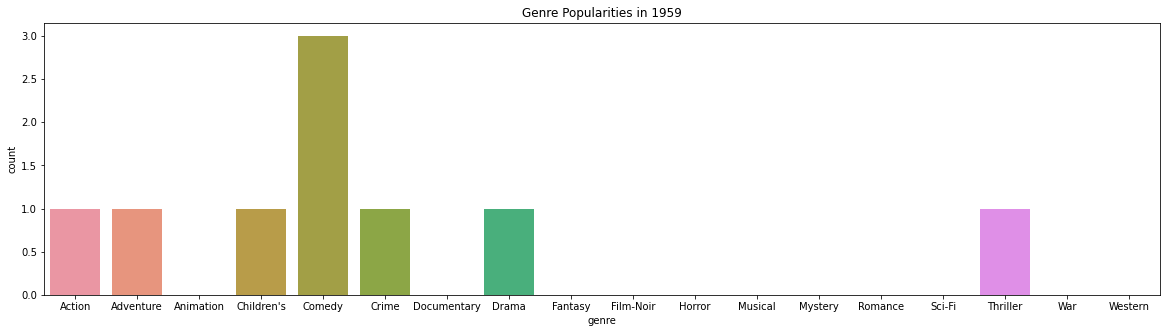

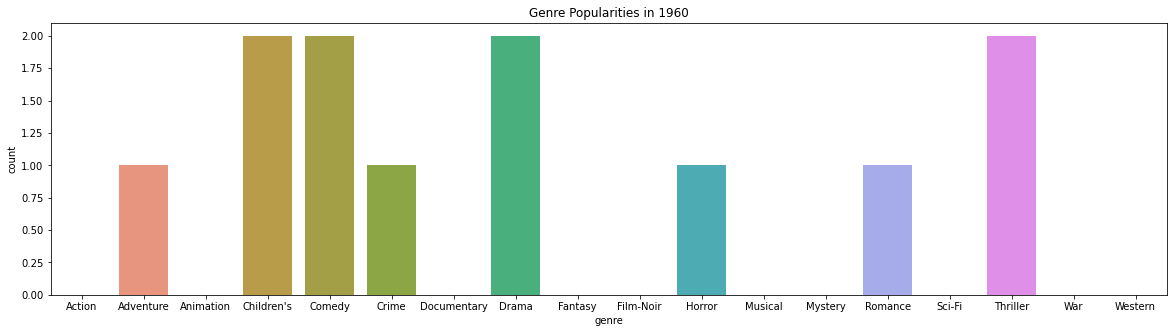

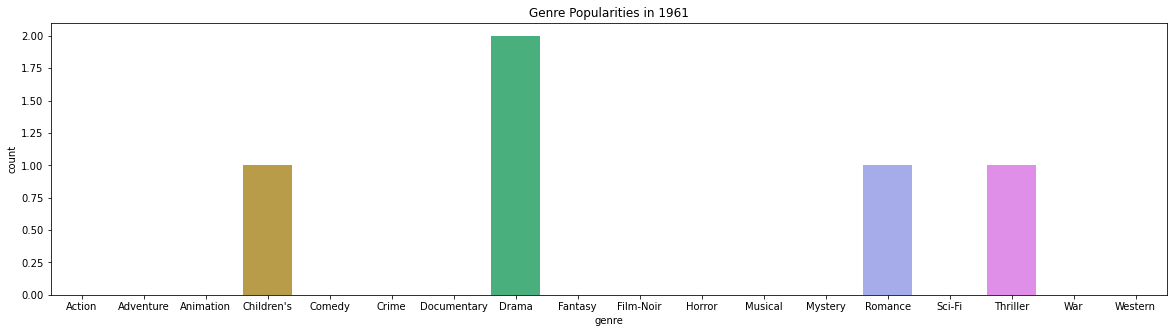

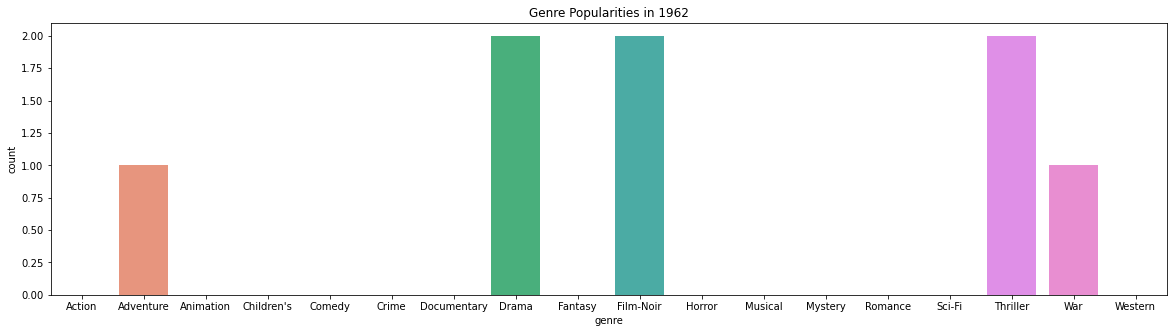

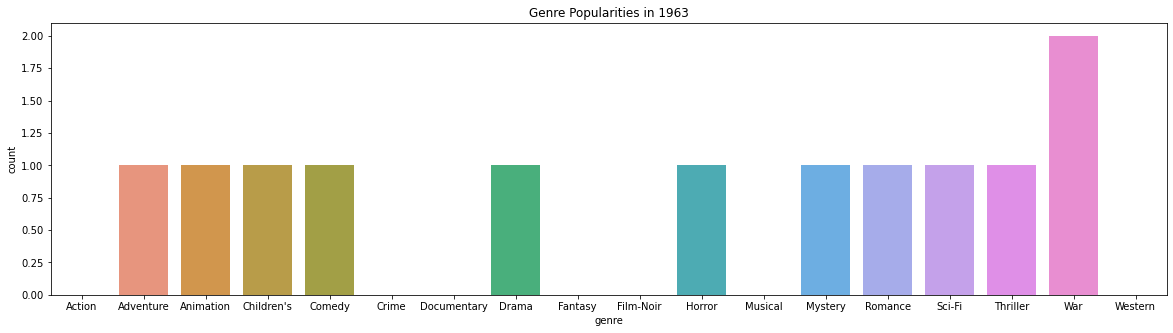

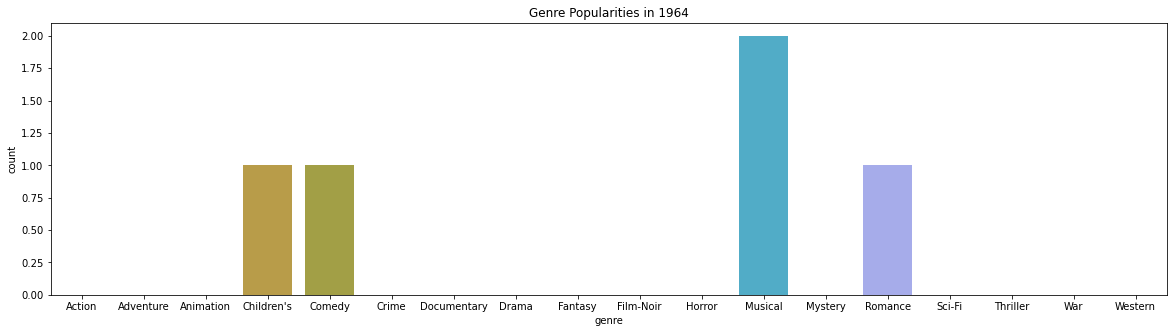

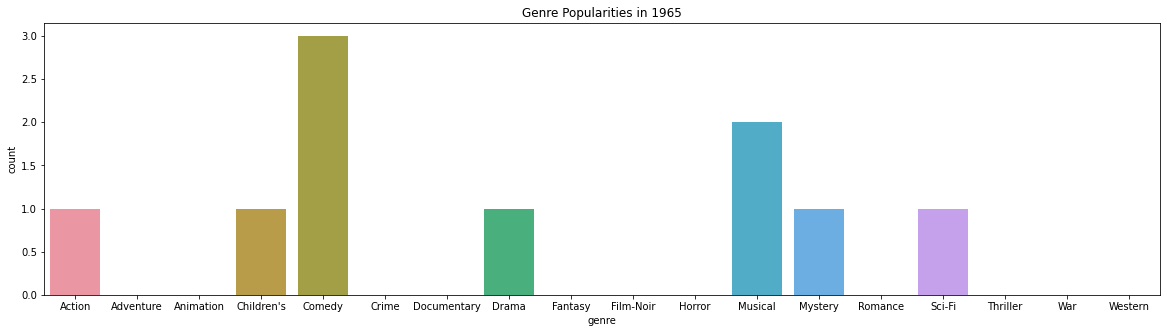

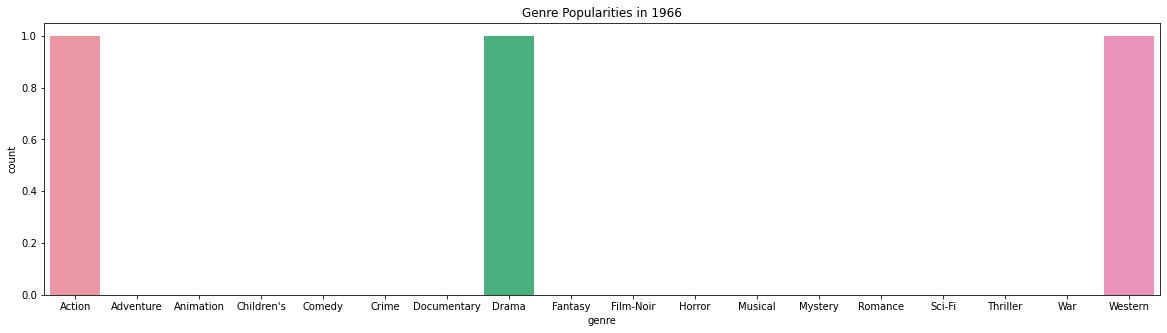

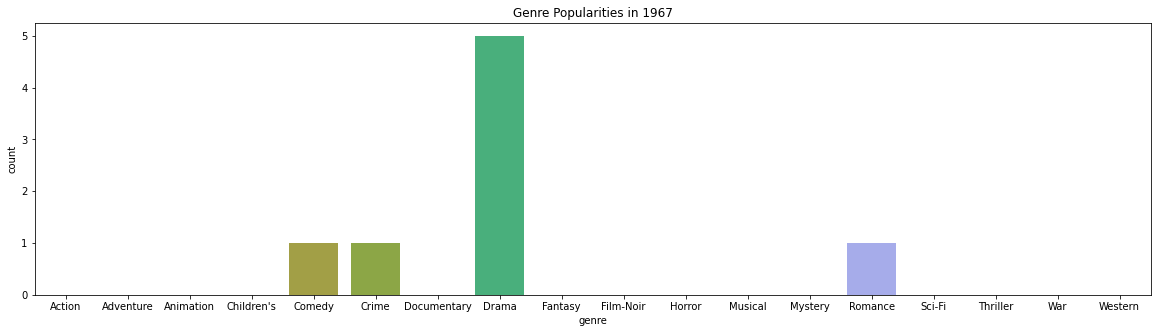

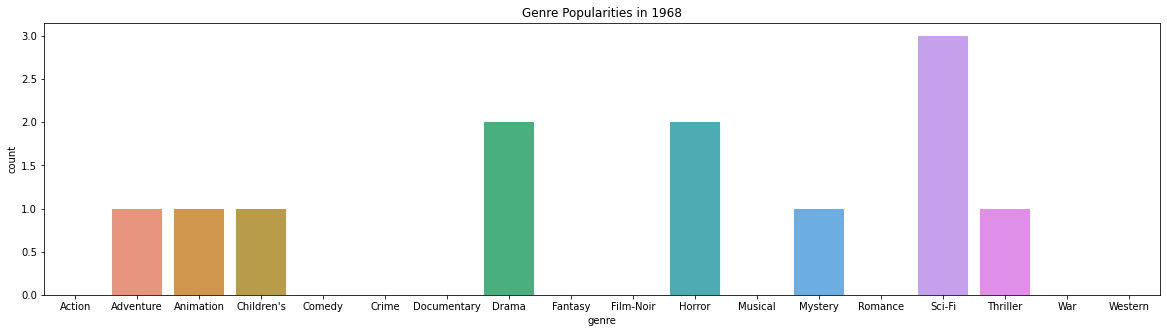

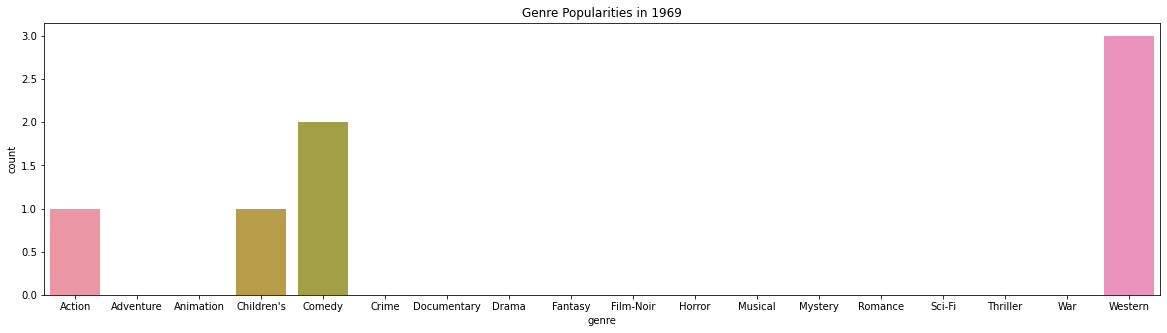

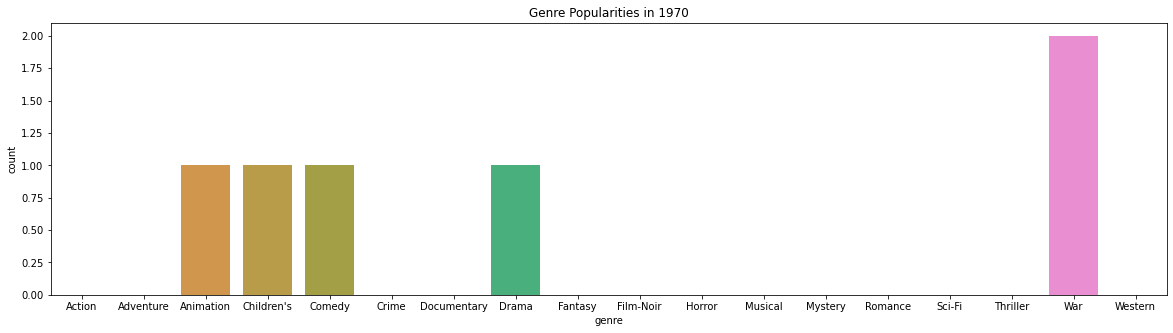

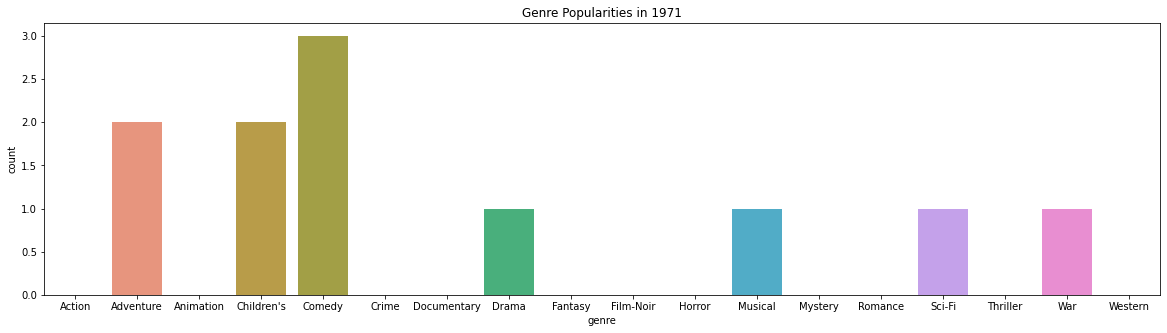

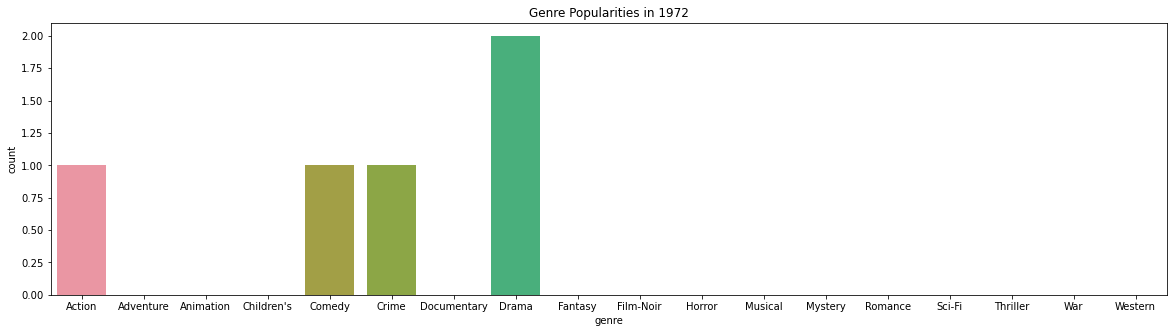

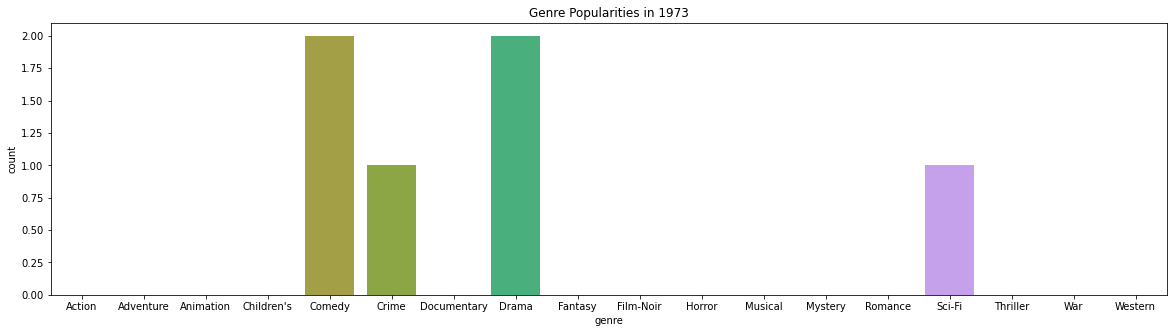

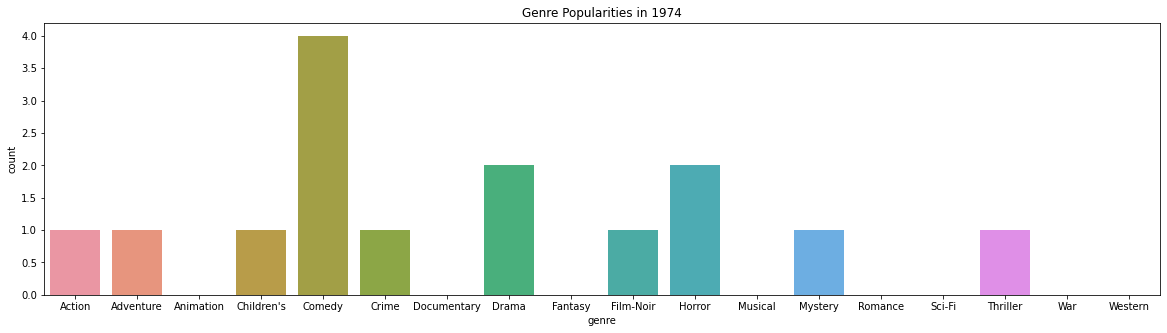

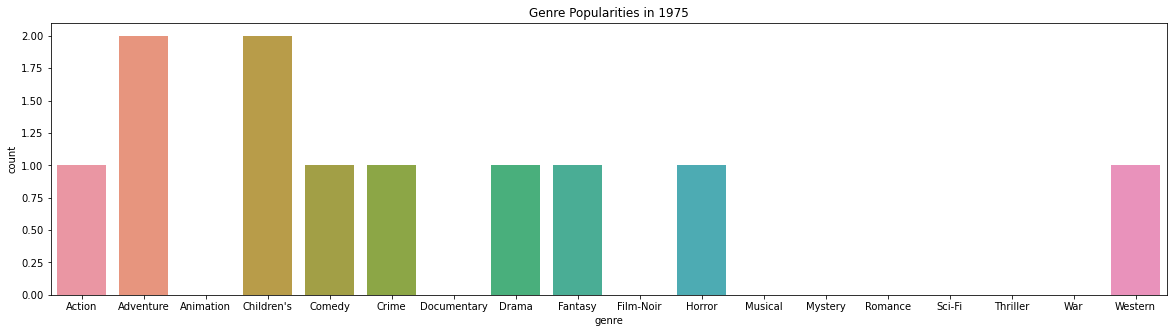

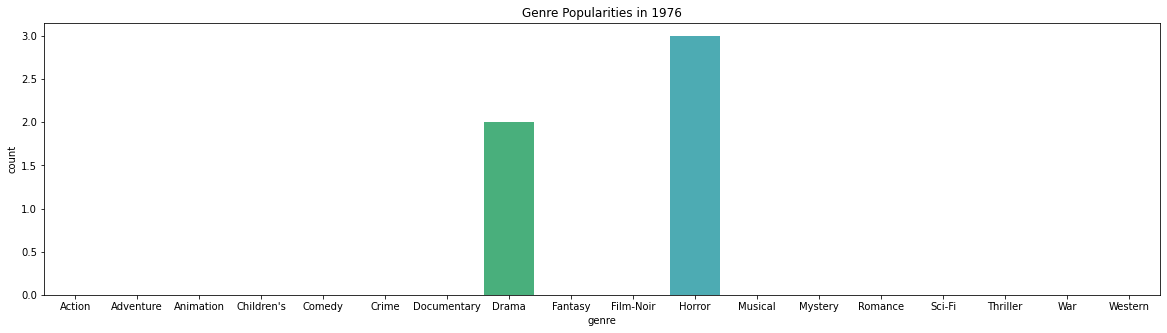

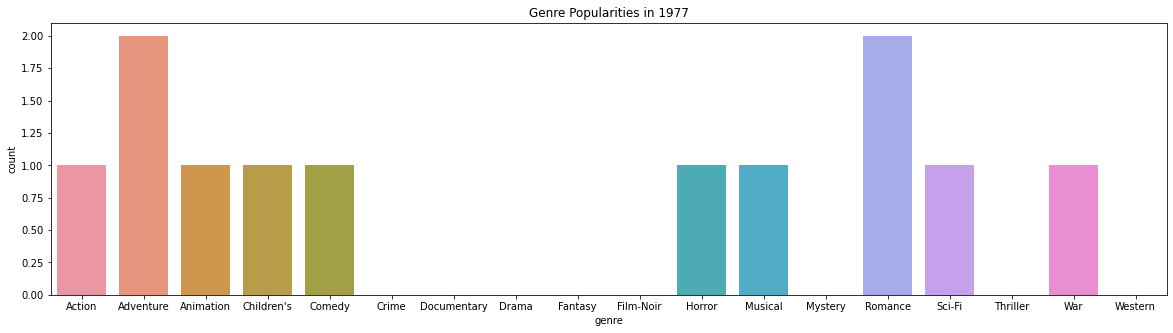

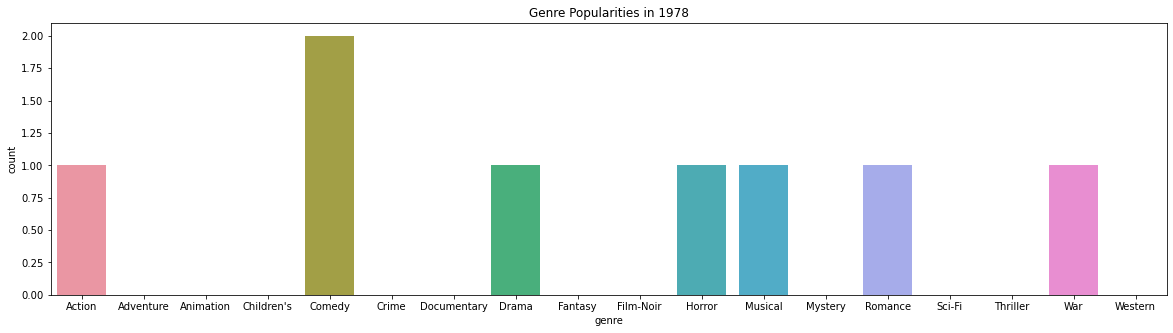

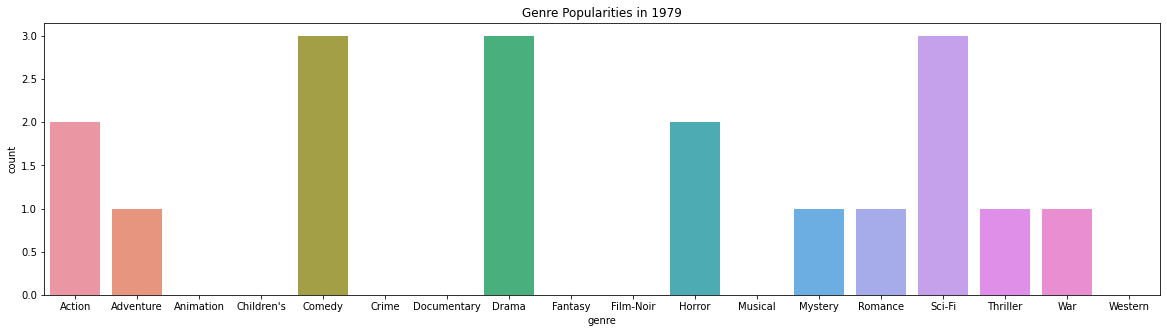

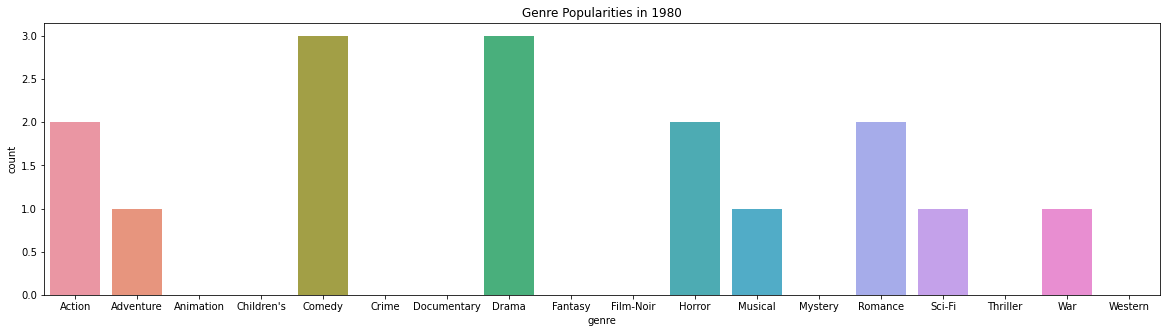

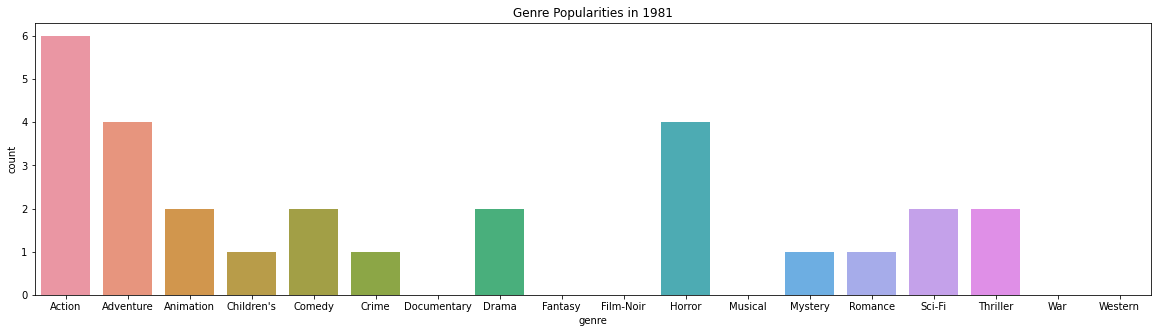

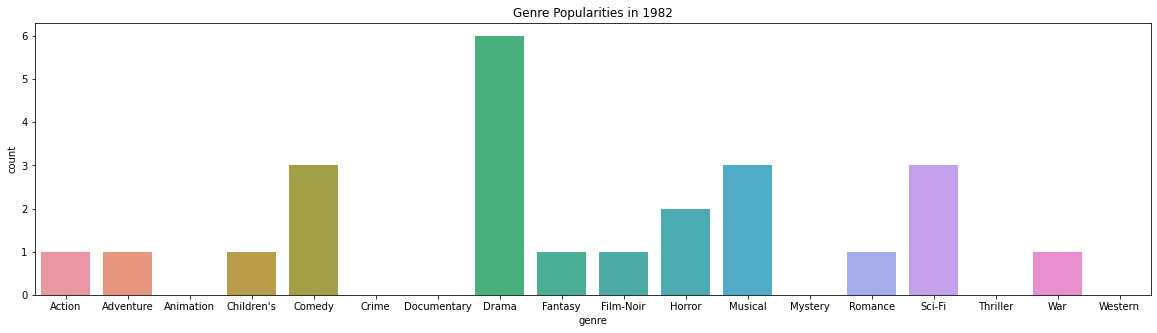

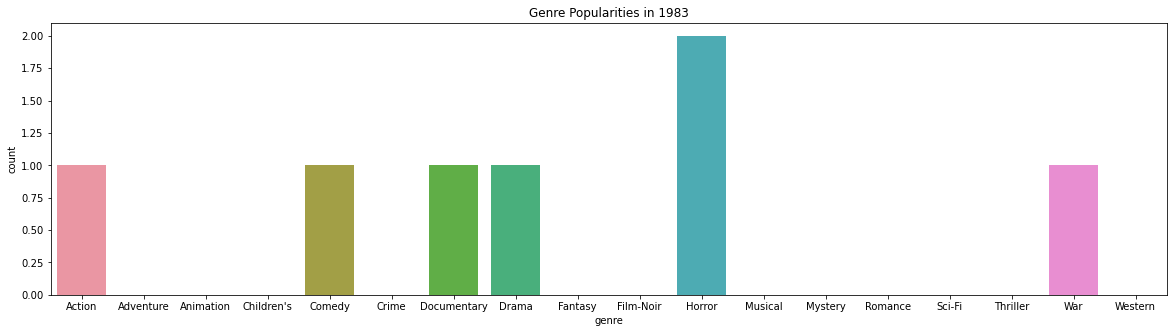

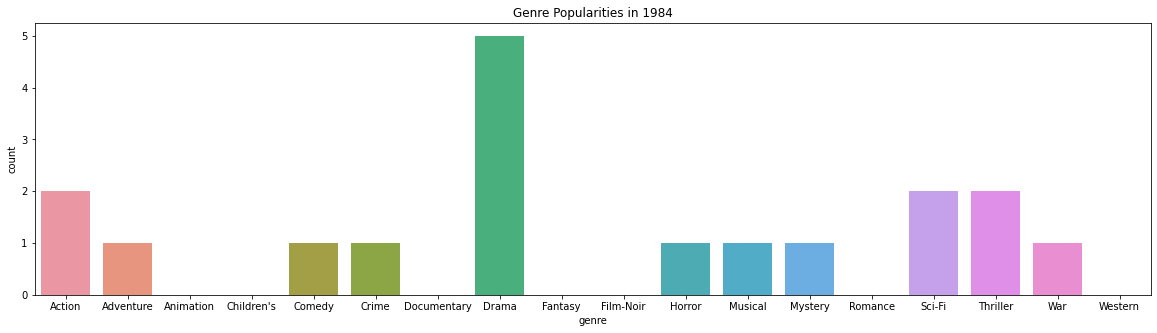

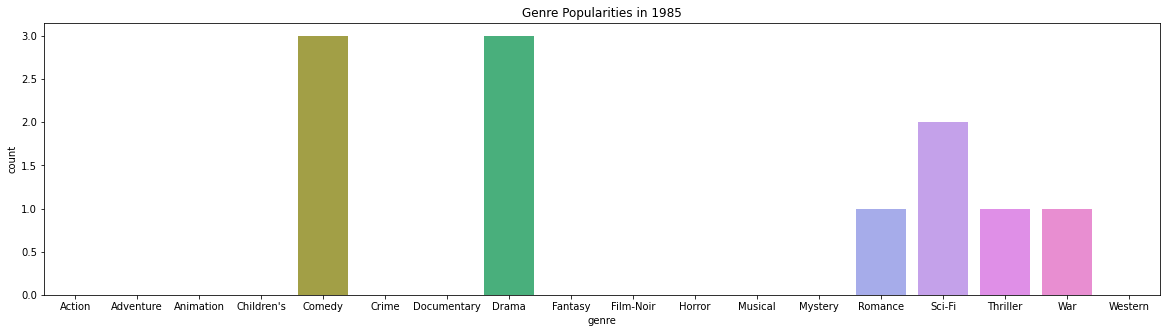

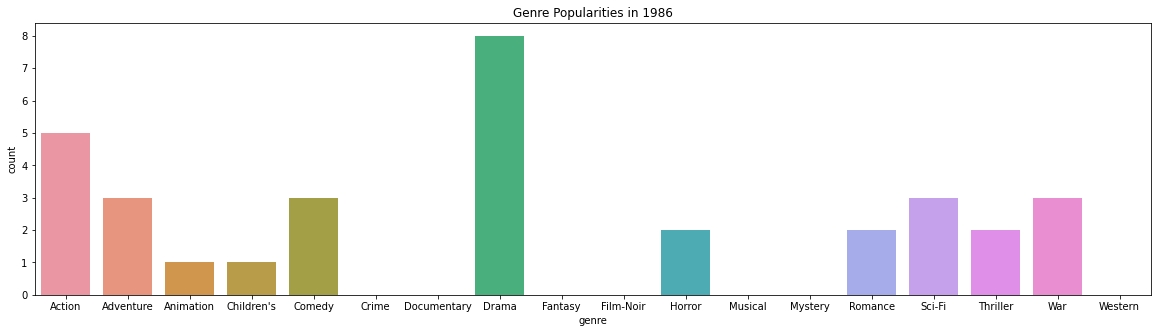

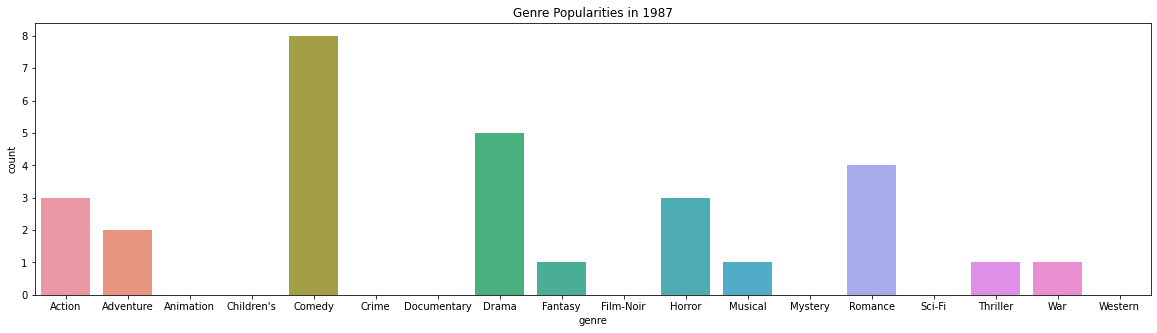

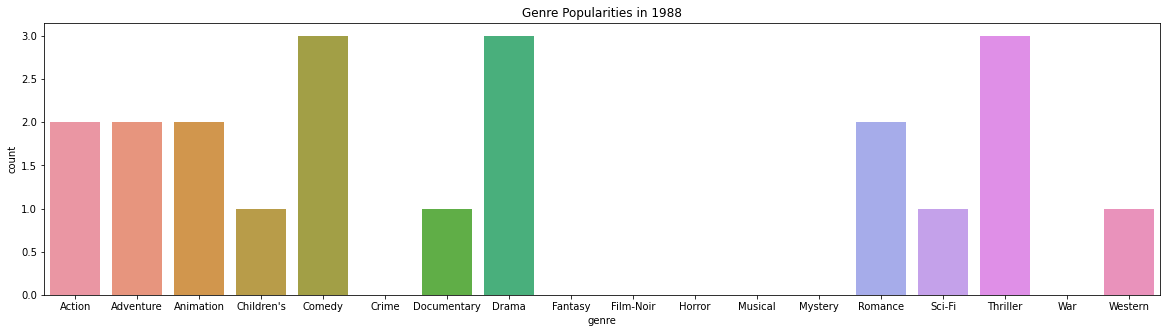

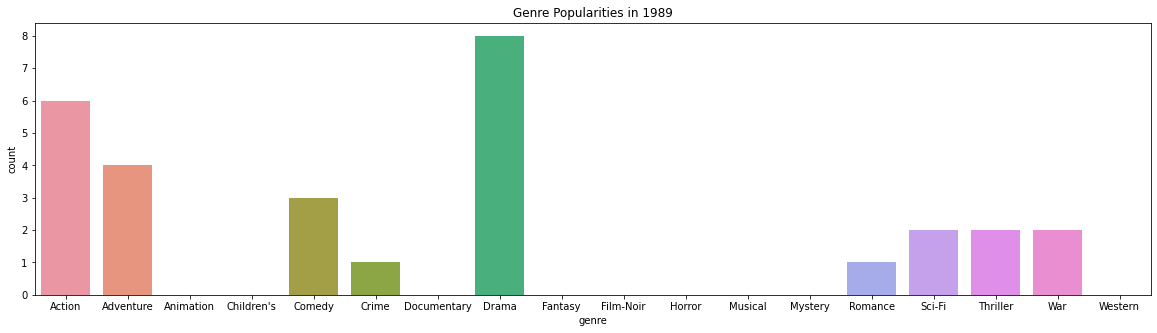

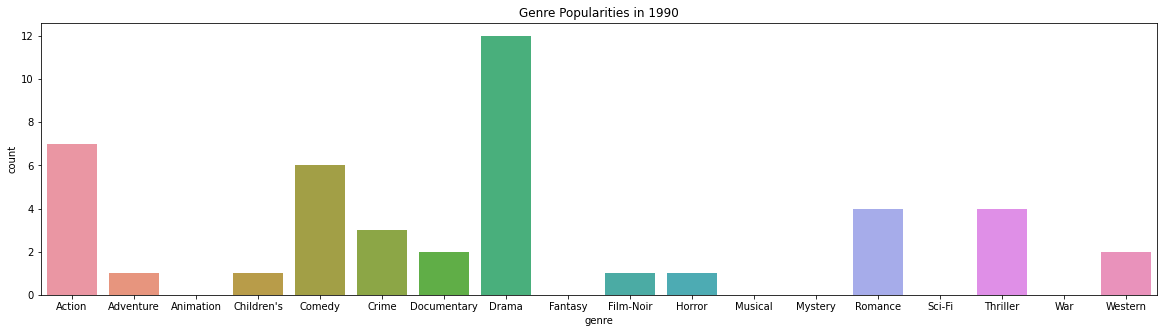

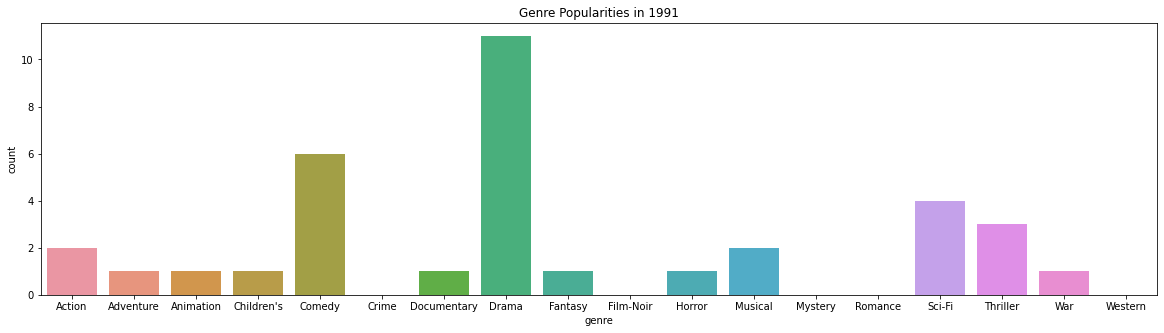

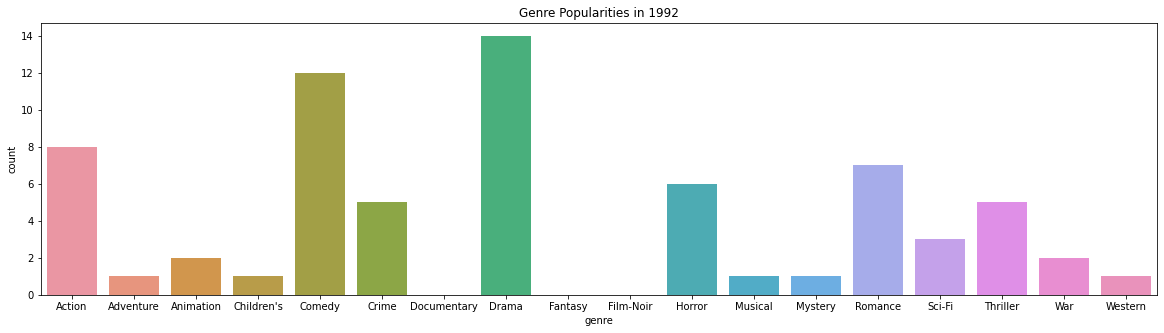

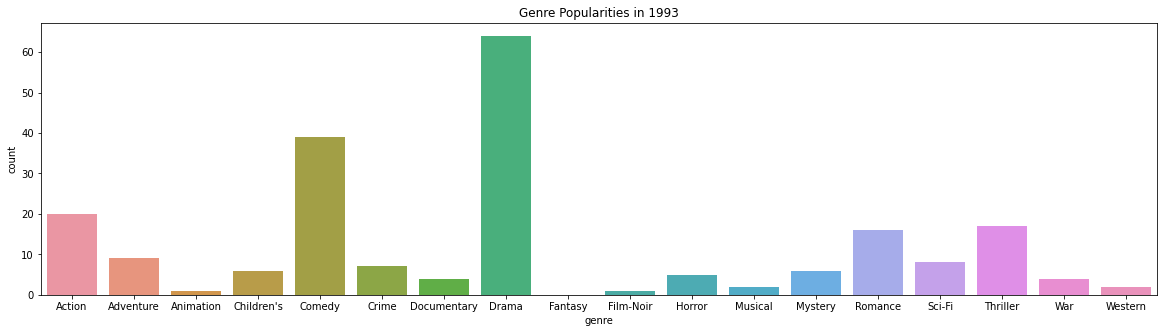

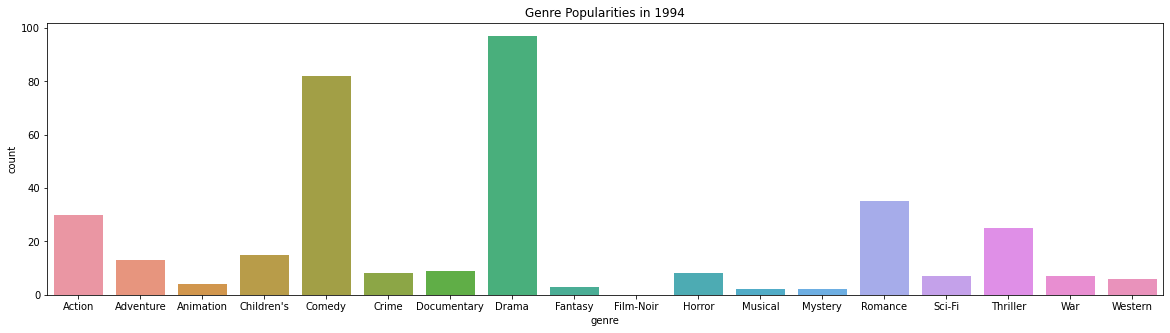

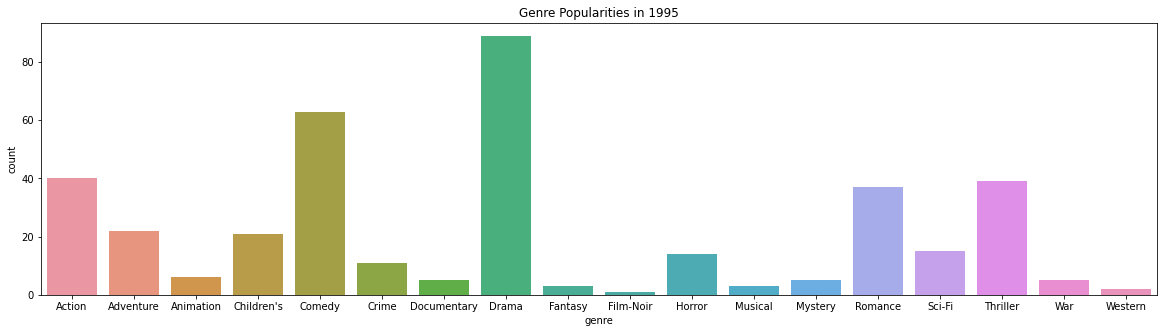

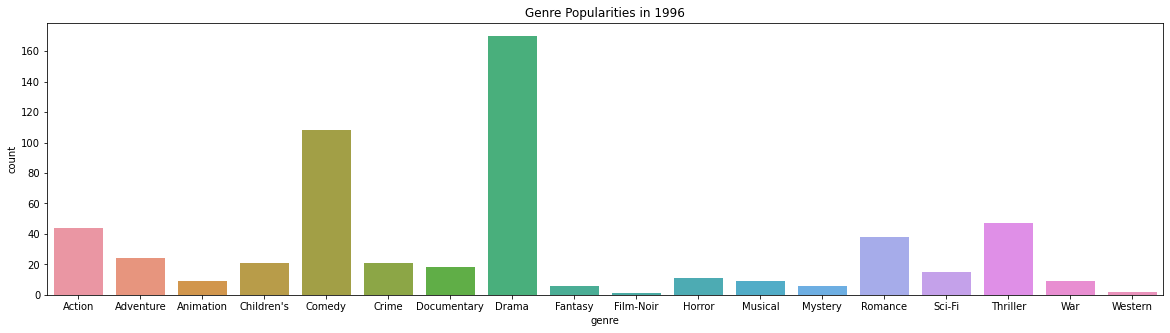

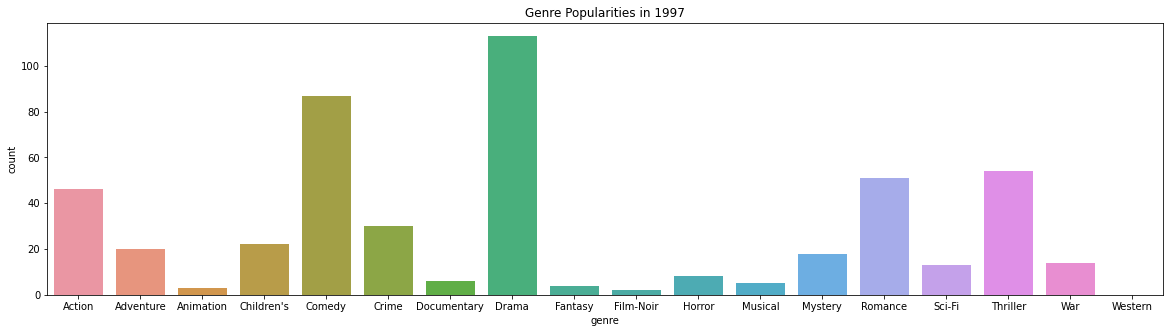

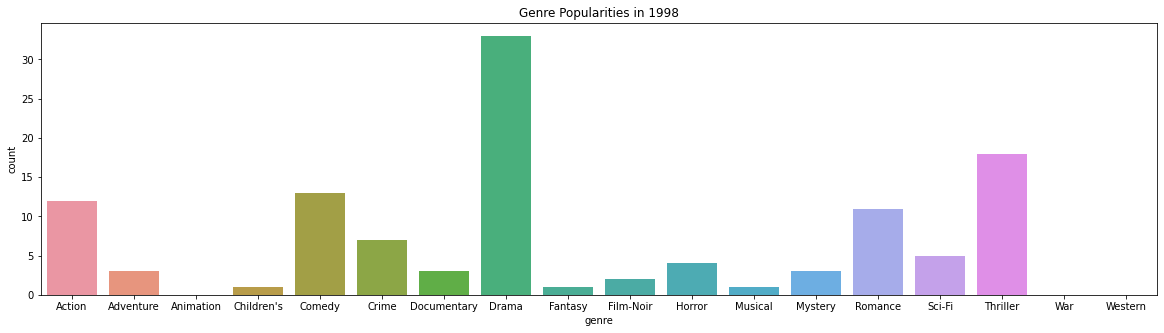

In [32]:
for y in years:
    plt.figure(figsize=(20,5))
    sns.countplot(data=df_year[df_year['year']==y], x='genre', order=genres)
    plt.title('Genre Popularities in '+str(y))
    plt.show()

## Popular Movies by Rating: 
(Displaying the top 25 movies by average rating, as a list/series/dataframe.
Considering only the movies which received at least a 100 ratings)

In [33]:
df_popmov = df_data.groupby(['item_id'])['rating'].agg(['count','mean']).sort_values(by='count', ascending=False)
df_popmov = df_popmov[df_popmov['count']>100]
df_popmov.sort_values(by='mean', ascending=False, inplace=True)
df_popmov = df_popmov.head(25)
df_popmov.reset_index(inplace=True)
df_popmov

,item_id,count,mean
0,408,112,4.491071
1,318,298,4.466443
2,169,118,4.466102
3,483,243,4.456790
4,64,283,4.445230
5,603,209,4.387560
6,12,267,4.385768
7,50,583,4.358491
8,178,125,4.344000
9,134,198,4.292929


In [34]:
pd.merge(df_item[['movie_id','movie_title']], df_popmov, how='inner', left_on='movie_id', right_on='item_id').drop('item_id', axis=1)

,movie_id,movie_title,count,mean
0,12,"Usual Suspects, The (1995)",267,4.385768
1,50,Star Wars (1977),583,4.358491
2,64,"Shawshank Redemption, The (1994)",283,4.445230
3,98,"Silence of the Lambs, The (1991)",390,4.289744
4,127,"Godfather, The (1972)",413,4.283293
5,134,Citizen Kane (1941),198,4.292929
6,169,"Wrong Trousers, The (1993)",118,4.466102
7,172,"Empire Strikes Back, The (1980)",367,4.204360
8,174,Raiders of the Lost Ark (1981),420,4.252381
9,178,12 Angry Men (1957),125,4.344000


## Verifying Statements:
### Statement 1:
- "men watch more drama than women" ?

In [35]:
dramas = df_item[df_item['Drama']!=0]['movie_id']
print('There are {} dramas out of {} movies.'.format(len(dramas), len(df_item)))
df_gender = df_data[df_data['item_id'].isin(dramas)].drop(['rating','timestamp'], axis=1)
df_gender.reset_index(drop=True, inplace=True)
print('There are {} rows out of {} for drama movies.'.format(len(df_gender), len(df_data)))
df_gender.head()

There are 725 dramas out of 1681 movies.
There are 39895 rows out of 100000 for drama movies.


,user_id,item_id
0,244,51
1,166,346
2,6,86
3,122,387
4,119,392


In [36]:
df_gender = pd.merge(df_gender, df_user[['user_id','gender']], on='user_id')
df_gender

,user_id,item_id,gender
0,244,51,M
1,244,815,M
2,244,707,M
3,244,310,M
4,244,172,M
...,...,...,...
39890,898,258,M
39891,895,275,F
39892,895,742,F
39893,895,283,F


In [37]:
df_gender['gender'].value_counts()/len(df_gender)

M    0.724076
F    0.275924
Name: gender, dtype: float64

In [38]:
df_user['gender'].value_counts()/len(df_user)

M    0.710498
F    0.289502
Name: gender, dtype: float64

1. Comparing the results of the last two calculations in our sample datasets, it can be concluded that darama movies have been watched more by men than women.

In [39]:
df_gender.drop_duplicates(subset=['user_id'], ignore_index=True, inplace=True)
df_gender

,user_id,item_id,gender
0,244,51,M
1,166,346,M
2,6,86,M
3,122,387,F
4,119,392,M
...,...,...,...
938,941,124,M
939,797,127,F
940,888,286,M
941,898,286,M


In [40]:
df_gender['gender'].value_counts()/len(df_gender)

M    0.710498
F    0.289502
Name: gender, dtype: float64

In [41]:
df_gender['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

In [42]:
df_user['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

2. Comparing the results of the last few calculations in our sample datasets, it can be concluded that all women and men have watched at least one drama movie.

***True statement: Men watch more drama than women***

### Statement 2
- "Men watch more Romance than women" ?

In [43]:
dramas = df_item[df_item['Drama']!=0]['movie_id']

df_gender = df_data[df_data['item_id'].isin(dramas)].drop(['rating','timestamp'], axis=1)
df_gender.reset_index(drop=True, inplace=True)

df_gender = pd.merge(df_gender, df_user[['user_id','gender']], on='user_id')

df_gender['gender'].value_counts()/len(df_gender)

df_user['gender'].value_counts()/len(df_user)

df_gender.drop_duplicates(subset=['user_id'], ignore_index=True, inplace=True)
df_gender

df_gender['gender'].value_counts()

df_user['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

In [44]:
def check_statements(genre):
    g = df_item[df_item[genre]!=0]['movie_id']
    df_g = df_data[df_data['item_id'].isin(g)].drop(['rating','timestamp'], axis=1)
    df_g.reset_index(drop=True, inplace=True)
    df_g = pd.merge(df_g, df_user[['user_id','gender']], on='user_id')
    
    print('*** While this is the percentages of users (men and women) in the dataset:')
    print(df_user['gender'].value_counts()/len(df_user))
    
    print('\n*** {} movies have been watched by (%):'.format(genre))
    print(df_g['gender'].value_counts()/len(df_g))
    
    df_g.drop_duplicates(subset=['user_id'], ignore_index=True, inplace=True)
    
    print('\n*** Total number of users:')
    print(df_user['gender'].value_counts())
    
    print('\n*** Total number of users who watched {} movies: '.format(genre))
    print(df_g['gender'].value_counts())
    return

In [45]:
check_statements('Romance')

*** While this is the percentages of users (men and women) in the dataset:
M    0.710498
F    0.289502
Name: gender, dtype: float64

*** Romance movies have been watched by (%):
M    0.698988
F    0.301012
Name: gender, dtype: float64

*** Total number of users:
M    670
F    273
Name: gender, dtype: int64

*** Total number of users who watched Romance movies: 
M    670
F    273
Name: gender, dtype: int64


***False statement: Men watch more Romance than women.***

In [46]:
check_statements('Sci-Fi')

*** While this is the percentages of users (men and women) in the dataset:
M    0.710498
F    0.289502
Name: gender, dtype: float64

*** Sci-Fi movies have been watched by (%):
M    0.79348
F    0.20652
Name: gender, dtype: float64

*** Total number of users:
M    670
F    273
Name: gender, dtype: int64

*** Total number of users who watched Sci-Fi movies: 
M    652
F    256
Name: gender, dtype: int64


In [47]:
np.array([625,256])/sum([625,256])

array([0.70942111, 0.29057889])

So, even though Sci-Fic movies have been watched by more men than women, but more indivisual women have watched Sci-Fic movies at least once compared to men.

***True statement: Women watch more Sci-Fic than men.***